In [1]:
%matplotlib inline
import glob
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, initializers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
file_paths = glob.glob(".\\data\\*")
print(file_paths)

['.\\data\\20200319_not_seating.csv', '.\\data\\20200319_seating.csv', '.\\data\\20200322a_not_seating.csv', '.\\data\\20200323a_seating.csv', '.\\data\\20200323b_not_seating.csv', '.\\data\\20200323c_not_seating.csv']


In [3]:
category =np.empty((0,1), float)
rssi =np.empty((0,100), float)

for file in file_paths:
    d = np.loadtxt(file, delimiter=',')
    category_tmp, rssi_tmp = np.hsplit(d, [1])
    rssi = np.concatenate([rssi, rssi_tmp], axis=0)
    category = np.concatenate([category, category_tmp], axis=0)

rssi = rssi * (-1) / 128
print("rssi array shape : ", rssi.shape)
#print(rssi)
category = tf.keras.utils.to_categorical(category, 2)
print("category array shape : ", category.shape)
#print(category)

rssi_train, rssi_test, category_train, category_test = train_test_split(rssi, category, test_size=0.2)
print("rssi training array shape : ", rssi_train.shape)
print(rssi_train)
print("category training array shape : ", category_train.shape)
print(category_train)
print("rssi test array shape : ", rssi_test.shape)
print("category test array shape : ", category_test.shape)

#train_data = tf.data.Dataset.from_tensor_slices((rssi_train, category_train))
#print(train_data)

rssi array shape :  (2098, 100)
category array shape :  (2098, 2)
rssi training array shape :  (1678, 100)
[[0.3359375 0.359375  0.3125    ... 0.3125    0.34375   0.3828125]
 [0.4453125 0.3359375 0.453125  ... 0.3359375 0.3828125 0.3359375]
 [0.4609375 0.4609375 0.359375  ... 0.3359375 0.375     0.4609375]
 ...
 [0.3671875 0.3203125 0.3515625 ... 0.359375  0.359375  0.328125 ]
 [0.34375   0.3046875 0.3046875 ... 0.3515625 0.3515625 0.328125 ]
 [0.328125  0.3203125 0.328125  ... 0.328125  0.3515625 0.3125   ]]
category training array shape :  (1678, 2)
[[0. 1.]
 [0. 1.]
 [0. 1.]
 ...
 [1. 0.]
 [0. 1.]
 [1. 0.]]
rssi test array shape :  (420, 100)
category test array shape :  (420, 2)


In [4]:
# モデルを作成
model = models.Sequential()
model.add(layers.Dense(64, input_shape=(100, ), activation='relu'))
#model.add(layers.Dropout(0.3))
model.add(layers.Dense(32, activation='relu'))
#model.add(layers.Dropout(0.3))
model.add(layers.Dense(2, activation='softmax'))

# サマリーを出力
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                6464      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 8,610
Trainable params: 8,610
Non-trainable params: 0
_________________________________________________________________


Train on 1678 samples, validate on 420 samples
Epoch 1/256
1678/1678 [==============================] - 1s 379us/sample - loss: 0.6857 - accuracy: 0.5459 - val_loss: 0.6850 - val_accuracy: 0.5429
Epoch 2/256
1678/1678 [==============================] - 0s 26us/sample - loss: 0.6863 - accuracy: 0.5417 - val_loss: 0.6862 - val_accuracy: 0.5429
Epoch 3/256
1678/1678 [==============================] - 0s 24us/sample - loss: 0.6855 - accuracy: 0.5459 - val_loss: 0.6850 - val_accuracy: 0.5429
Epoch 4/256
1678/1678 [==============================] - 0s 24us/sample - loss: 0.6851 - accuracy: 0.5459 - val_loss: 0.6848 - val_accuracy: 0.5429
Epoch 5/256
1678/1678 [==============================] - 0s 21us/sample - loss: 0.6856 - accuracy: 0.5453 - val_loss: 0.6843 - val_accuracy: 0.5429
Epoch 6/256
1678/1678 [==============================] - 0s 24us/sample - loss: 0.6852 - accuracy: 0.5459 - val_loss: 0.6836 - val_accuracy: 0.5429
Epoch 7/256
1678/1678 [==============================] - 0s 23us

Epoch 56/256
1678/1678 [==============================] - 0s 22us/sample - loss: 0.6181 - accuracy: 0.6073 - val_loss: 0.6258 - val_accuracy: 0.7000
Epoch 57/256
1678/1678 [==============================] - 0s 24us/sample - loss: 0.6126 - accuracy: 0.6496 - val_loss: 0.6349 - val_accuracy: 0.7214
Epoch 58/256
1678/1678 [==============================] - 0s 23us/sample - loss: 0.6086 - accuracy: 0.6764 - val_loss: 0.6226 - val_accuracy: 0.7143
Epoch 59/256
1678/1678 [==============================] - 0s 22us/sample - loss: 0.6036 - accuracy: 0.6603 - val_loss: 0.6267 - val_accuracy: 0.5262
Epoch 60/256
1678/1678 [==============================] - 0s 23us/sample - loss: 0.6038 - accuracy: 0.6728 - val_loss: 0.6560 - val_accuracy: 0.5452
Epoch 61/256
1678/1678 [==============================] - 0s 23us/sample - loss: 0.6199 - accuracy: 0.6180 - val_loss: 0.6957 - val_accuracy: 0.5357
Epoch 62/256
1678/1678 [==============================] - 0s 20us/sample - loss: 0.6383 - accuracy: 0.6085

Epoch 111/256
1678/1678 [==============================] - 0s 23us/sample - loss: 0.5396 - accuracy: 0.7086 - val_loss: 0.5361 - val_accuracy: 0.7071
Epoch 112/256
1678/1678 [==============================] - 0s 24us/sample - loss: 0.5133 - accuracy: 0.7318 - val_loss: 0.5518 - val_accuracy: 0.7357
Epoch 113/256
1678/1678 [==============================] - 0s 21us/sample - loss: 0.5119 - accuracy: 0.7408 - val_loss: 0.5411 - val_accuracy: 0.6881
Epoch 114/256
1678/1678 [==============================] - 0s 23us/sample - loss: 0.5145 - accuracy: 0.7324 - val_loss: 0.5381 - val_accuracy: 0.7190
Epoch 115/256
1678/1678 [==============================] - 0s 21us/sample - loss: 0.5097 - accuracy: 0.7402 - val_loss: 0.5497 - val_accuracy: 0.7286
Epoch 116/256
1678/1678 [==============================] - 0s 22us/sample - loss: 0.5220 - accuracy: 0.7402 - val_loss: 0.5448 - val_accuracy: 0.7357
Epoch 117/256
1678/1678 [==============================] - 0s 23us/sample - loss: 0.5121 - accuracy:

Epoch 220/256
1678/1678 [==============================] - 0s 23us/sample - loss: 0.5168 - accuracy: 0.7312 - val_loss: 0.5107 - val_accuracy: 0.7286
Epoch 221/256
1678/1678 [==============================] - 0s 23us/sample - loss: 0.4836 - accuracy: 0.7509 - val_loss: 0.5198 - val_accuracy: 0.7357
Epoch 222/256
1678/1678 [==============================] - 0s 22us/sample - loss: 0.4702 - accuracy: 0.7592 - val_loss: 0.5060 - val_accuracy: 0.7310
Epoch 223/256
1678/1678 [==============================] - 0s 23us/sample - loss: 0.4683 - accuracy: 0.7658 - val_loss: 0.5191 - val_accuracy: 0.7333
Epoch 224/256
1678/1678 [==============================] - 0s 23us/sample - loss: 0.4818 - accuracy: 0.7467 - val_loss: 0.5234 - val_accuracy: 0.7143
Epoch 225/256
1678/1678 [==============================] - 0s 21us/sample - loss: 0.4730 - accuracy: 0.7580 - val_loss: 0.5032 - val_accuracy: 0.7214
Epoch 226/256
1678/1678 [==============================] - 0s 23us/sample - loss: 0.4751 - accuracy:

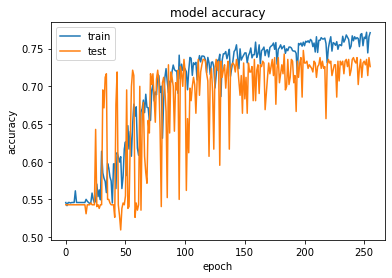

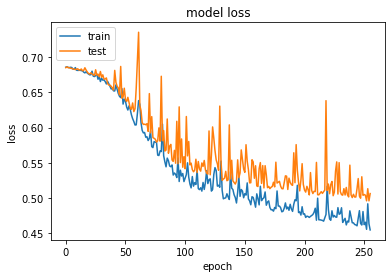

In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

training = model.fit(rssi_train, category_train,
                    batch_size=128,
                    epochs=256,
                    #verbose=1,
                    validation_data=(rssi_test, category_test))

#正答率
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [6]:
model.save('model/seating_detection_algorithm.h5', save_format='h5')

In [1]:
import tensorflow as tf
from tensorflow.keras import models
import numpy as np

model = models.load_model('model/seating_detection_algorithm.h5')

x = np.loadtxt(".\data\\20200319_seating.csv", delimiter=',')
print("x array shape : ", x.shape)
print(x)

x = x[0]
print("x array shape : ", x.shape)
print(x)
x = np.delete(x, 0)
print("x array shape : ", x.shape)
print(x)
x = x.reshape(1,100)
print("x array shape : ", x.shape)
print(x)
x = x * (-1) / 128
print("x array shape : ", x.shape)
print(x)

print(np.argmax(model.predict(x)))
#l = model.predict(x)

x array shape :  (421, 101)
[[  1. -47. -52. ... -47. -52. -52.]
 [  1. -43. -50. ... -51. -43. -46.]
 [  1. -46. -46. ... -46. -53. -43.]
 ...
 [  1. -46. -44. ... -43. -48. -44.]
 [  1. -44. -48. ... -60. -44. -44.]
 [  1. -48. -59. ... -44. -45. -45.]]
x array shape :  (101,)
[  1. -47. -52. -53. -50. -44. -47. -47. -54. -43. -51. -44. -47. -52.
 -51. -43. -46. -46. -47. -50. -50. -43. -47. -47. -50. -50. -43. -43.
 -42. -46. -43. -47. -49. -42. -47. -50. -50. -49. -47. -51. -42. -46.
 -48. -50. -50. -43. -47. -51. -43. -49. -50. -47. -46. -47. -50. -51.
 -50. -43. -48. -42. -47. -50. -43. -52. -52. -51. -48. -52. -51. -52.
 -43. -48. -47. -51. -52. -43. -51. -51. -43. -48. -51. -50. -51. -51.
 -50. -47. -47. -50. -50. -43. -43. -49. -53. -47. -50. -50. -43. -47.
 -47. -52. -52.]
x array shape :  (100,)
[-47. -52. -53. -50. -44. -47. -47. -54. -43. -51. -44. -47. -52. -51.
 -43. -46. -46. -47. -50. -50. -43. -47. -47. -50. -50. -43. -43. -42.
 -46. -43. -47. -49. -42. -47. -50. -50.